In [1]:
%%capture
!pip install netcdf4
!pip install geopandas

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import geopandas as gpd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#abriendo los shapefiles
ruta_Sudamerica = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/TPM_II/datos/shps/South_America.shp"
Sudamerica = gpd.read_file(ruta_Sudamerica)
ruta_lago = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/lago_titicaca/lago_titicaca_sideteva_puno.shp"
lago_titicaca = gpd.read_file(ruta_lago)
lago_titicaca = lago_titicaca.to_crs("EPSG:4326")

#abrendo el netcdf
ruta_pp = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/PISCO/piscov2p1(prec).nc"
PISCO_pp = xr.open_dataset(ruta_pp,decode_times=False)
PISCO_pp=PISCO_pp.rename({"X":"longitude","Y":"latitude","T":"time"})
PISCO_pp["time"] = pd.date_range(start="1981-01-01",freq="1M", periods= 432)
pp_filtro=PISCO_pp.sel(time=slice('1981-06-01T00:00:00.000000000','2010-05-31T12:00:00.000000000'))
pp_filtro.groupby('time.season')
##agrupando por estaciones
pp_summer = pp_filtro.groupby('time.season').mean(dim='time').sel(season='DJF')
pp_winter = pp_filtro.groupby('time.season').mean(dim='time').sel(season='JJA')
pp_spring = pp_filtro.groupby('time.season').mean(dim='time').sel(season='SON')
pp_autumn = pp_filtro.groupby('time.season').mean(dim='time').sel(season='MAM')

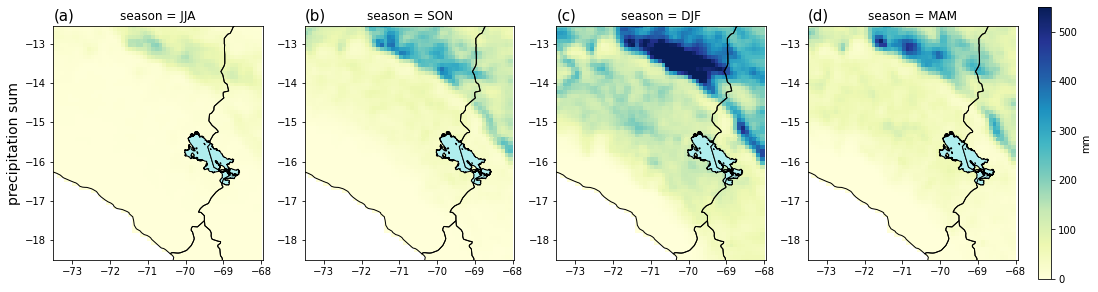

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(18, 5))
#invierno
ax1 = axs[0]
pp_winter.Prec.plot(ax=ax1, cmap ="YlGnBu", vmin=0,vmax=550,add_colorbar=False)
lugar = Sudamerica.plot(ax=ax1,facecolor="none",edgecolor="black")
lago = lago_titicaca.plot(ax=ax1,facecolor="paleturquoise",edgecolor="black")
minx, miny, maxx, maxy =  -73.5, -18.5, -67.95, -12.55
ax1.set_xlim(minx, maxx)
ax1.set_ylim(miny, maxy)
ax1.set_ylabel("precipitation sum", size=14)
ax1.set_xlabel("")
axs[0].set_title('(a)', loc='left', fontsize = 15)

#primavera
ax2 = axs[1]
pp_spring.Prec.plot(ax=ax2, cmap ="YlGnBu",vmin=0,vmax=550, add_colorbar=False)
lugar = Sudamerica.plot(ax=ax2,facecolor="none",edgecolor="black")
lago = lago_titicaca.plot(ax=ax2,facecolor="paleturquoise",edgecolor="black")
minx, miny, maxx, maxy =  -73.5, -18.5, -67.95, -12.55
ax2.set_xlim(minx, maxx)
ax2.set_ylim(miny, maxy)
ax2.set_ylabel("")
ax2.set_xlabel("")
axs[1].set_title('(b)', loc='left', fontsize = 15)

#verano
ax3 = axs[2]
pp_summer.Prec.plot(ax=ax3, cmap ="YlGnBu",vmin=0,vmax=550, add_colorbar=False)
lugar = Sudamerica.plot(ax=ax3,facecolor="none",edgecolor="black")
lago = lago_titicaca.plot(ax=ax3,facecolor="paleturquoise",edgecolor="black")
minx, miny, maxx, maxy =  -73.5, -18.5, -67.95, -12.55
ax3.set_xlim(minx, maxx)
ax3.set_ylim(miny, maxy)
ax3.set_ylabel("")
ax3.set_xlabel("")
axs[2].set_title('(c)', loc='left', fontsize = 15)

#autumn
ax4 = axs[3]
prec = pp_autumn.Prec.plot(ax=ax4, cmap ="YlGnBu",vmin=0,vmax=550,add_colorbar=False)
lugar = Sudamerica.plot(ax=ax4,facecolor="none",edgecolor="black")
lago = lago_titicaca.plot(ax=ax4,facecolor="paleturquoise",edgecolor="black")
minx, miny, maxx, maxy =  -73.5, -18.5, -67.95, -12.55
ax4.set_xlim(minx, maxx)
ax4.set_ylim(miny, maxy)
ax4.set_ylabel("")
ax4.set_xlabel("")
axs[3].set_title('(d)', loc='left', fontsize = 15)


fig.colorbar(prec, ax=axs, label = "mm", fraction=0.02, pad=0.02)
fig.savefig("Figura3.png")